In [1]:
import sys
import os

# Add the repo root to sys.path
ROOT_REL_PATH_FROM_NB = "../.."
repo_path = os.path.abspath(os.path.join(os.getcwd(), ROOT_REL_PATH_FROM_NB))  # adjust as needed
if repo_path not in sys.path:
    sys.path.insert(0, repo_path)

print(sys.path)

from src.votekit.ballot_generator import ImpartialCulture, ImpartialAnonymousCulture 
from src.votekit.pref_interval import PreferenceInterval
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from math import factorial

['/home/willithg/MGGG/VoteKit', '/home/willithg/miniconda3/lib/python312.zip', '/home/willithg/miniconda3/lib/python3.12', '/home/willithg/miniconda3/lib/python3.12/lib-dynload', '', '/home/willithg/miniconda3/lib/python3.12/site-packages']


In [ ]:
num_cands = 5
cands = [f"{i}" for i in range(num_cands)]
#iac = ImpartialAnonymousCulture(candidates=cands)
ic_uncached = ImpartialCulture(candidates=cands)
ic_cached = ImpartialCulture(candidates = cands, use_total_ballots_cache=True)



use_cache: False
use_cache: True


In [ ]:
#iac.generate_profile(number_of_ballots=1000, use_optimized=True)
num_ballots = 100_00
#%timeit -n 3 -r 1 
%timeit -n 2 -r 1 ic_uncached.generate_profile(number_of_ballots=num_ballots, use_optimized=True, allow_short_ballots=True)
%timeit -n 2 -r 1 ic_cached.generate_profile(number_of_ballots=num_ballots, use_optimized=True, allow_short_ballots=True)

1.23 s ± 0 ns per loop (mean ± std. dev. of 1 run, 2 loops each)
1.17 s ± 0 ns per loop (mean ± std. dev. of 1 run, 2 loops each)
{(20, 20): 6613313319248080000, (21, 21): 138879579704209680021, (19, 20): 330665665962403999, (18, 20): 17403456103284420, (17, 20): 966858672404689, (16, 20): 56874039553216, (15, 20): 3554627472075, (14, 20): 236975164804, (13, 20): 16926797485, (12, 20): 1302061344, (11, 20): 108505111, (10, 20): 9864100, (9, 20): 986409, (8, 20): 109600, (7, 20): 13699, (6, 20): 1956, (5, 20): 325, (4, 20): 64, (3, 20): 15, (2, 20): 4, (1, 20): 1}


### Gather runtime data for ic draws, cached vs uncached

In [3]:
# create some instances of ic vs iac
# average some runs
num_ballots = [100, 1_000, 10_000, 50_000, 100_000, 200_000, 1_000_000]
uncached_times = [-1 for _ in range(len(num_ballots))]
cached_times = [-1 for _ in range(len(num_ballots))]
for i, ballot_size in tqdm(enumerate(num_ballots)):
    cache_run = %timeit -o -n 3 -r 1 ic_cached.generate_profile(number_of_ballots=ballot_size, use_optimized=True, allow_short_ballots=True)
    uncached_run = %timeit -o -n 3 -r 1 ic_uncached.generate_profile(number_of_ballots=ballot_size, use_optimized=True, allow_short_ballots=True)
    
    cached_times[i] = cache_run.average
    uncached_times[i] = uncached_run.average
    ic_cached._clear_cache()


0it [00:00, ?it/s]

12.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
12.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
24.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
31.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


2it [00:00,  7.82it/s]

87.3 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


3it [00:00,  3.06it/s]

113 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
359 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


4it [00:03,  1.12s/it]

458 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
460 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


5it [00:06,  1.80s/it]

559 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
911 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


6it [00:12,  3.33s/it]

1.22 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)
4.75 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


7it [00:45,  6.51s/it]

6.17 s ± 0 ns per loop (mean ± std. dev. of 1 run, 3 loops each)


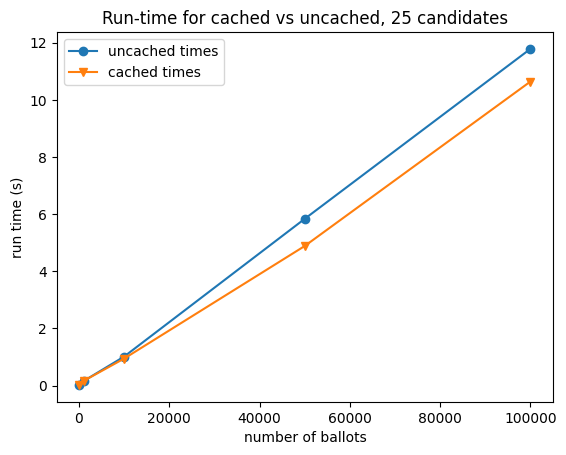

In [5]:
#import matplotlib.pyplot as plt

plt.plot(num_ballots, uncached_times, label="uncached times", marker="o")
plt.plot(num_ballots, cached_times, label="cached times", marker="v")
plt.xlabel("number of ballots")
plt.ylabel("run time (s)")
plt.title(f"Run-time for cached vs uncached, {num_cands} candidates")
plt.legend()
plt.show()

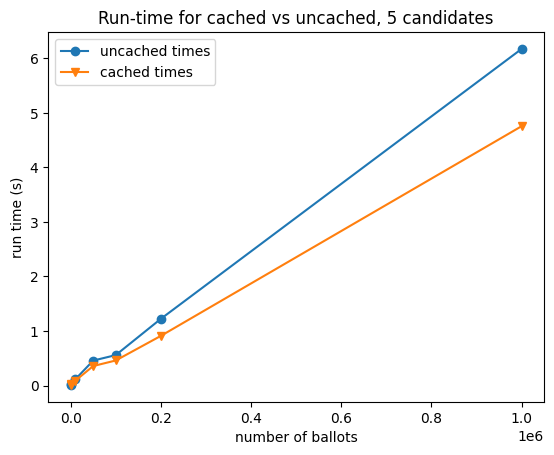

In [4]:
plt.plot(num_ballots, uncached_times, label="uncached times", marker="o")
plt.plot(num_ballots, cached_times, label="cached times", marker="v")
plt.xlabel("number of ballots")
plt.ylabel("run time (s)")
plt.title(f"Run-time for cached vs uncached, {num_cands} candidates")
plt.legend()
plt.show()

### Get runtime data for single cache vs double cache

In [40]:
num_cands_cache = 5
cands_cache = [f"{i}" for i in range(num_cands_cache)]
#iac = ImpartialAnonymousCulture(candidates=cands)
ic_single_cache = ImpartialCulture(candidates=cands_cache, use_total_ballots_cache=True, use_single_cache=True)
ic_double_cache = ImpartialCulture(candidates=cands_cache, use_total_ballots_cache=True, use_single_cache=False)



use_cache: True
use single cache True
use_cache: True
use single cache False


In [41]:
num_ballots_cache = [100, 1_000, 10_000, 50_000, 100_000, 200_000, 500_000, 1_000_000]
print(len(num_ballots_cache))
single_cache_times = [-1 for _ in range(len(num_ballots_cache))]
double_cache_times = [-1 for _ in range(len(num_ballots_cache))]
single_cache_write_reads = [None for _ in range(len(num_ballots_cache))]
double_cache_write_reads = [None for _ in range(len(num_ballots_cache))]
for i, ballot_size in tqdm(enumerate(num_ballots_cache)):
    single_run = %timeit -o -q -n 3 -r 1 ic_single_cache.generate_profile(number_of_ballots=ballot_size, use_optimized=True, allow_short_ballots=True)
    ic_single_cache._clear_cache()
    double_run = %timeit -o -q -n 3 -r 1 ic_double_cache.generate_profile(number_of_ballots=ballot_size, use_optimized=True, allow_short_ballots=True)
    ic_double_cache._clear_cache()

    single_cache_times[i] = single_run.average
    double_cache_times[i] = double_run.average
    #single_cache_write_reads[i] = (ic_single_cache._cache_writes, ic_single_cache._cache_reads)
    #double_cache_write_reads[i] = (ic_double_cache._cache_writes, ic_double_cache._cache_reads)
    

8


0it [00:00, ?it/s]

8it [01:16,  9.53s/it]


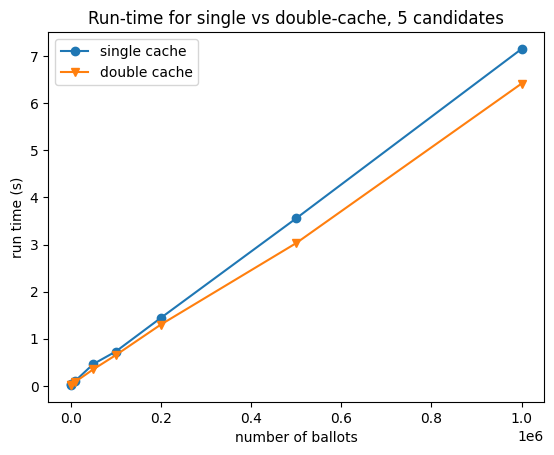

In [42]:
plt.plot(num_ballots_cache, single_cache_times, label="single cache", marker="o")
plt.plot(num_ballots_cache, double_cache_times, label="double cache", marker="v")
plt.xlabel("number of ballots")
plt.ylabel("run time (s)")
plt.title(f"Run-time for single vs double-cache, {num_cands_cache} candidates")
plt.legend()
plt.show()

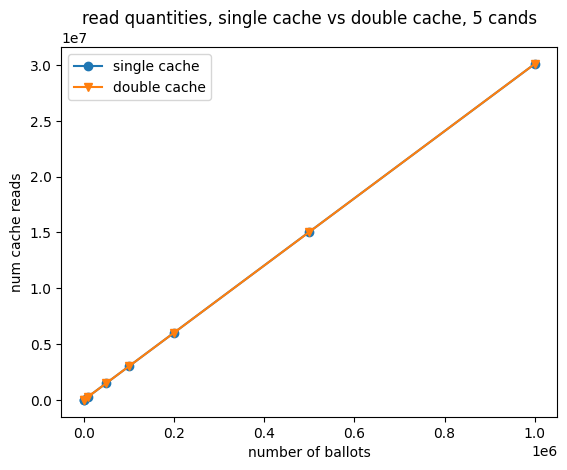

In [17]:
plt.plot(num_ballots_cache, [d[1] for d in single_cache_write_reads], label="single cache", marker="o")
plt.plot(num_ballots_cache, [d[1] for d in double_cache_write_reads], label="double cache", marker="v")
plt.xlabel("number of ballots")
plt.ylabel("num cache reads")
plt.title(f"read quantities, single cache vs double cache, {num_cands_cache} cands")
plt.legend()
plt.show()

In [43]:
double_cache_times[-1] - single_cache_times[-1]

-0.7349137473332421

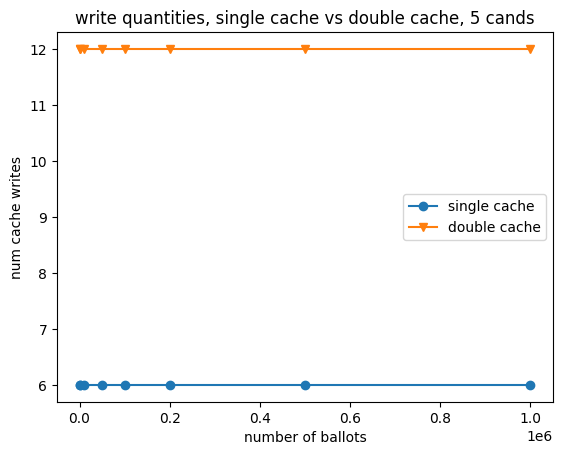

In [18]:
plt.plot(num_ballots_cache, [d[0] for d in single_cache_write_reads], label="single cache", marker="o")
plt.plot(num_ballots_cache, [d[0] for d in double_cache_write_reads], label="double cache", marker="v")
plt.xlabel("number of ballots")
plt.ylabel("num cache writes")
plt.title(f"write quantities, single cache vs double cache, {num_cands_cache} cands")
plt.legend()
plt.show()

We might be getting weird result because each instance may be sharing
the same cache. I guess we need to decouple this by creating two more
dictionries in the instance?